# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/cifar/cifar-10-python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:36, 4.61MB/s]                              


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 2:
Image - Min Value: 21 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


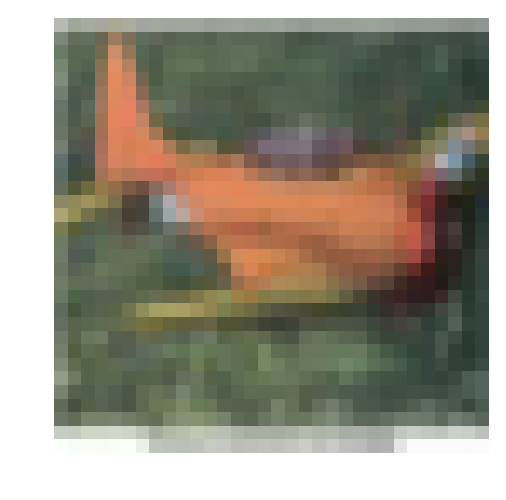

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 2
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    # Have to work across each channel
    # Will be something like:
    pix_max = 255
    pix_min = 0
    
    return x / ( pix_max - pix_min )


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    # one-hot encoding:  label binarizer from scikitlearn, preprocessing
    num_labels = 10
    import numpy as np
    # Matrix
    ident_mat = np.eye(num_labels, dtype=np.float32)
    # Return column vector/array
    return ident_mat[x]


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder( tf.float32, shape =[ None, *image_shape ], name = "x" )


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder( tf.float32, shape = [ None, n_classes ], name = "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder( tf.float32, shape = None, name = "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [22]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor:          TensorFlow Tensor
    :param conv_num_outputs:  Number of outputs for the convolutional layer ... i.e. filter / output depth
    :param conv_ksize:        kernel size 2-D Tuple for the convolutional layer ... filter size
    :param conv_strides:      Stride 2-D Tuple for convolution
    :param pool_ksize:        kernel size 2-D Tuple for pool
    :param pool_strides:      Stride 2-D Tuple for pool
    : return:                 A tensor that represents convolution and max pooling of x_tensor
    """
    # Filter variables and constants
    INPUT_HEIGHT  = x_tensor.get_shape().as_list()[ 1 ]
    INPUT_WIDTH   = x_tensor.get_shape().as_list()[ 2 ]
    INPUT_DEPTH   = x_tensor.get_shape().as_list()[ 3 ]
    FILTER_WIDTH  = conv_ksize[ 0 ]  # [(W−F+2P)/S] + 1
    FILTER_HEIGHT = conv_ksize[ 1 ]  # [(H-F+2P)/S] + 1
        
    OUTPUT_DEPTH  = conv_num_outputs   # number of filters
    BIAS_SIZE     = conv_num_outputs  # 10 biases are same size as number of labels
    
    #print( "INPUT_HEIGHT  = ", INPUT_HEIGHT)
    #print( "INPUT_WIDTH   = ", INPUT_WIDTH)
    #print( "INPUT_DEPTH   = ", INPUT_DEPTH)
    #print( "FILTER_HEIGHT = ", FILTER_HEIGHT)
    #print( "FILTER_WIDTH  = ", FILTER_WIDTH)
    #print( "OUTPUT_DEPTH  = ", OUTPUT_DEPTH)
    #print( "BIAS_SIZE     = ", BIAS_SIZE)
     
    # Weights and biases:  tf.Variable()
    # don't use all zeros or ones!
    weights = tf.Variable( tf.truncated_normal( [ FILTER_WIDTH, FILTER_HEIGHT, int(INPUT_DEPTH), OUTPUT_DEPTH ])) 
    #print( "passed weight assignment")
    
    # tf.nn.conv2d(
    #   input, 
    #   filter, 
    #   strides, 
    #   padding, 
    #   gpu, 
    #   data format, 
    #   name )
    conv_layer = tf.nn.conv2d( x_tensor, 
                               weights, 
                               strides=[1, conv_strides[0], conv_strides[1], 1], 
                               padding='SAME')
    #print( "passed tf.nn.conv2d stage")
    
    # Bias
    bias = tf.Variable( tf.zeros( BIAS_SIZE ))
    conv_layer = tf.nn.bias_add( conv_layer, bias)
    #print( "passed tf.nn.bias_add stage")
    
    conv_layer = tf.nn.relu( conv_layer )
    #print( "passed tf.nn.relu stage")
    
    # Max pooling
    # max_pool( value,  
    #           ksize, 1d int of 4 elements,  The size of the window for each dimension of the input tensor.
    #           strides,
    #           padding,
    #           data_format='NHWC',
    #           name=None )

    my_ksize  =[1, FILTER_WIDTH,    FILTER_HEIGHT,   1]
    my_strides=[1, pool_strides[0], pool_strides[1], 1]
    
    #print( "Max pool ksize   = ", my_ksize)
    #print( "Max pool strides = ", my_strides)
    
    conv_layer = tf.nn.max_pool( conv_layer,
                                 ksize = my_ksize,
                                 strides= my_strides, 
                                 padding='SAME')
    #print( "passed tf.nn.max_pool stage")   
    
    return conv_layer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [37]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    # 4d --> 2d
    #print( "Input shape = ", x_tensor.get_shape().as_list() ) --> returns [None, 10, 30, 6]
    INPUT_HEIGHT  = x_tensor.get_shape().as_list()[ 1 ]
    INPUT_WIDTH   = x_tensor.get_shape().as_list()[ 2 ]
    INPUT_DEPTH   = x_tensor.get_shape().as_list()[ 3 ]
    #print( "INPUT_HEIGHT  = ", INPUT_HEIGHT)
    #print( "INPUT_WIDTH   = ", INPUT_WIDTH)
    #print( "INPUT_DEPTH   = ", INPUT_DEPTH)
    
    # Initial error on my part:  1st parameter of shape was "None" instead of "-1"
    flat_out =  tf.reshape( x_tensor, shape = [ -1, INPUT_HEIGHT * INPUT_WIDTH * INPUT_DEPTH ] )
    
    return flat_out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [24]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    from tensorflow.contrib.layers import fully_connected
    full_out = fully_connected( x_tensor, num_outputs)
    return full_out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [25]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # neeed to apply def fully_conn(x_tensor, num_outputs):
    x_shape = x_tensor.get_shape().as_list()[1]
    weights = tf.Variable( tf.truncated_normal( shape=[x_shape, num_outputs], 
                                             mean=0.0,
                                             stddev=0.05  ) )
    w8_result = tf.matmul( x_tensor, weights )
    
    biases  = tf.Variable( tf.Variable(tf.zeros( num_outputs )))
    out = tf.nn.bias_add( w8_result, biases )                          
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [79]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    NUM_OUTPUTS  = 32
    FILTER_SIZE  = [ 5, 5 ]    
    # H_out = [(H-F+2P)/S] + 1.
    STRIDES      = [ 1, 1 ]  
    POOL_KSIZE   = [ 2, 2 ]
    POOL_STRIDES = [ 2, 2 ]
    
    cnet_model1 = conv2d_maxpool(x, 
                                NUM_OUTPUTS, 
                                FILTER_SIZE, 
                                STRIDES, 
                                POOL_KSIZE, 
                                POOL_STRIDES)
    
    #cnet_model1 = tf.nn.dropout( cnet_model1, keep_prob )
    
    # Next layer
    FILTER_SIZE  = [ 3, 3 ]
    STRIDES      = [ 1, 1 ]  
    POOL_KSIZE   = [ 2, 2 ]
    POOL_STRIDES = [ 2, 2 ]
    NUM_OUTPUTS  = 64
    cnet_model2 = conv2d_maxpool( cnet_model1,
                                  NUM_OUTPUTS, 
                                  FILTER_SIZE, 
                                  STRIDES, 
                                  POOL_KSIZE, 
                                  POOL_STRIDES)
    
    #cnet_model2 = tf.nn.dropout( cnet_model2, keep_prob )    
    
    # Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    cnet_model2 = flatten( cnet_model2 )

    # Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    NUM_OUTPUTS = 1024
    fc1 = fully_conn( cnet_model2, 
                      NUM_OUTPUTS )
    
    #fc1 = tf.nn.dropout( fc1, keep_prob )
    
    NUM_OUTPUTS = 512
    
    # Next layer
    fc2 = fully_conn( fc1, 
                      NUM_OUTPUTS )
    
    fc2 = tf.nn.dropout( fc2, 
                         keep_prob )
    
    
    #NUM_OUTPUTS = 128
    #fc3 = fully_conn( fc2,
    #                  NUM_OUTPUTS )
    #fc3 = tf.nn.dropout( fc3,
    #                     keep_prob )
    
    # Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    NUM_OUTPUTS = 10
    out = output( fc2, 
                  NUM_OUTPUTS )
    
    # return output
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [80]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session:          Current TensorFlow session
    : optimizer:        TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch:    Batch of Numpy image data
    : label_batch:      Batch of Numpy label data
    """
    session.run(optimizer, 
                feed_dict={ x: feature_batch, y: label_batch,
                keep_prob: keep_probability})

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [81]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    drop_keep_prob = 1.0
    
    loss = sess.run( cost, feed_dict = { x:  feature_batch, 
                                         y:    label_batch, 
                                         keep_prob: drop_keep_prob })
    print( "Loss = ", loss)
    
    val_acc = sess.run(accuracy, feed_dict={ x:  valid_features, 
                                             y:    valid_labels, 
                                             keep_prob: drop_keep_prob })
    
    print( "Validation accuracy = ", val_acc)
         

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [83]:
# TODO: Tune Parameters
epochs = 200
batch_size = 4096
keep_probability = 0.75

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [85]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss =  273.194
Validation accuracy =  0.098
Epoch  2, CIFAR-10 Batch 1:  Loss =  91.4991
Validation accuracy =  0.101
Epoch  3, CIFAR-10 Batch 1:  Loss =  48.2453
Validation accuracy =  0.123
Epoch  4, CIFAR-10 Batch 1:  Loss =  29.7633
Validation accuracy =  0.1062
Epoch  5, CIFAR-10 Batch 1:  Loss =  14.3761
Validation accuracy =  0.1082
Epoch  6, CIFAR-10 Batch 1:  Loss =  11.1054
Validation accuracy =  0.1496
Epoch  7, CIFAR-10 Batch 1:  Loss =  7.13552
Validation accuracy =  0.1782
Epoch  8, CIFAR-10 Batch 1:  Loss =  4.25356
Validation accuracy =  0.1476
Epoch  9, CIFAR-10 Batch 1:  Loss =  2.85635
Validation accuracy =  0.173
Epoch 10, CIFAR-10 Batch 1:  Loss =  2.35201
Validation accuracy =  0.1932
Epoch 11, CIFAR-10 Batch 1:  Loss =  2.26014
Validation accuracy =  0.1434
Epoch 12, CIFAR-10 Batch 1:  Loss =  2.18625
Validation accuracy =  0.1756
Epoch 13, CIFAR-10 Batch 1:  Loss =  2.18498
Validation accur

Validation accuracy =  0.5032
Epoch 110, CIFAR-10 Batch 1:  Loss =  0.548624
Validation accuracy =  0.4996
Epoch 111, CIFAR-10 Batch 1:  Loss =  0.535493
Validation accuracy =  0.5102
Epoch 112, CIFAR-10 Batch 1:  Loss =  0.527682
Validation accuracy =  0.5076
Epoch 113, CIFAR-10 Batch 1:  Loss =  0.529254
Validation accuracy =  0.5104
Epoch 114, CIFAR-10 Batch 1:  Loss =  0.528467
Validation accuracy =  0.5058
Epoch 115, CIFAR-10 Batch 1:  Loss =  0.50393
Validation accuracy =  0.5098
Epoch 116, CIFAR-10 Batch 1:  Loss =  0.489319
Validation accuracy =  0.5084
Epoch 117, CIFAR-10 Batch 1:  Loss =  0.489787
Validation accuracy =  0.5132
Epoch 118, CIFAR-10 Batch 1:  Loss =  0.483902
Validation accuracy =  0.5106
Epoch 119, CIFAR-10 Batch 1:  Loss =  0.471756
Validation accuracy =  0.5044
Epoch 120, CIFAR-10 Batch 1:  Loss =  0.455285
Validation accuracy =  0.5128
Epoch 121, CIFAR-10 Batch 1:  Loss =  0.465691
Validation accuracy =  0.5048
Epoch 122, CIFAR-10 Batch 1:  Loss =  0.45199
V

# Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [86]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss =  341.335
Validation accuracy =  0.0978
Epoch  1, CIFAR-10 Batch 2:  Loss =  134.454
Validation accuracy =  0.1574
Epoch  1, CIFAR-10 Batch 3:  Loss =  73.2444
Validation accuracy =  0.0998
Epoch  1, CIFAR-10 Batch 4:  Loss =  43.4653
Validation accuracy =  0.108
Epoch  1, CIFAR-10 Batch 5:  Loss =  13.7463
Validation accuracy =  0.109
Epoch  2, CIFAR-10 Batch 1:  Loss =  18.1118
Validation accuracy =  0.115
Epoch  2, CIFAR-10 Batch 2:  Loss =  8.22928
Validation accuracy =  0.1356
Epoch  2, CIFAR-10 Batch 3:  Loss =  5.96966
Validation accuracy =  0.1416
Epoch  2, CIFAR-10 Batch 4:  Loss =  3.90784
Validation accuracy =  0.1556
Epoch  2, CIFAR-10 Batch 5:  Loss =  3.09564
Validation accuracy =  0.219
Epoch  3, CIFAR-10 Batch 1:  Loss =  2.4097
Validation accuracy =  0.2106
Epoch  3, CIFAR-10 Batch 2:  Loss =  2.28798
Validation accuracy =  0.2474
Epoch  3, CIFAR-10 Batch 3:  Loss =  2.19364
Validation accuracy =  0.2484
Epoch  3, CIFAR-10

Validation accuracy =  0.5558
Epoch 23, CIFAR-10 Batch 1:  Loss =  0.883483
Validation accuracy =  0.5554
Epoch 23, CIFAR-10 Batch 2:  Loss =  0.856471
Validation accuracy =  0.5584
Epoch 23, CIFAR-10 Batch 3:  Loss =  0.843136
Validation accuracy =  0.5564
Epoch 23, CIFAR-10 Batch 4:  Loss =  0.848124
Validation accuracy =  0.5682
Epoch 23, CIFAR-10 Batch 5:  Loss =  0.83925
Validation accuracy =  0.558
Epoch 24, CIFAR-10 Batch 1:  Loss =  0.849066
Validation accuracy =  0.5624
Epoch 24, CIFAR-10 Batch 2:  Loss =  0.832537
Validation accuracy =  0.5636
Epoch 24, CIFAR-10 Batch 3:  Loss =  0.827189
Validation accuracy =  0.5646
Epoch 24, CIFAR-10 Batch 4:  Loss =  0.804475
Validation accuracy =  0.566
Epoch 24, CIFAR-10 Batch 5:  Loss =  0.79636
Validation accuracy =  0.561
Epoch 25, CIFAR-10 Batch 1:  Loss =  0.818069
Validation accuracy =  0.563
Epoch 25, CIFAR-10 Batch 2:  Loss =  0.801299
Validation accuracy =  0.5678
Epoch 25, CIFAR-10 Batch 3:  Loss =  0.780017
Validation accurac

Epoch 44, CIFAR-10 Batch 4:  Loss =  0.436747
Validation accuracy =  0.5928
Epoch 44, CIFAR-10 Batch 5:  Loss =  0.467363
Validation accuracy =  0.5868
Epoch 45, CIFAR-10 Batch 1:  Loss =  0.501325
Validation accuracy =  0.595
Epoch 45, CIFAR-10 Batch 2:  Loss =  0.449983
Validation accuracy =  0.6004
Epoch 45, CIFAR-10 Batch 3:  Loss =  0.474602
Validation accuracy =  0.5898
Epoch 45, CIFAR-10 Batch 4:  Loss =  0.435053
Validation accuracy =  0.594
Epoch 45, CIFAR-10 Batch 5:  Loss =  0.46221
Validation accuracy =  0.5946
Epoch 46, CIFAR-10 Batch 1:  Loss =  0.494808
Validation accuracy =  0.5958
Epoch 46, CIFAR-10 Batch 2:  Loss =  0.452399
Validation accuracy =  0.6002
Epoch 46, CIFAR-10 Batch 3:  Loss =  0.442962
Validation accuracy =  0.596
Epoch 46, CIFAR-10 Batch 4:  Loss =  0.427088
Validation accuracy =  0.5978
Epoch 46, CIFAR-10 Batch 5:  Loss =  0.436977
Validation accuracy =  0.6004
Epoch 47, CIFAR-10 Batch 1:  Loss =  0.484424
Validation accuracy =  0.601
Epoch 47, CIFAR-1

Validation accuracy =  0.6146
Epoch 66, CIFAR-10 Batch 3:  Loss =  0.285925
Validation accuracy =  0.6146
Epoch 66, CIFAR-10 Batch 4:  Loss =  0.291148
Validation accuracy =  0.6066
Epoch 66, CIFAR-10 Batch 5:  Loss =  0.255541
Validation accuracy =  0.6118
Epoch 67, CIFAR-10 Batch 1:  Loss =  0.29773
Validation accuracy =  0.6128
Epoch 67, CIFAR-10 Batch 2:  Loss =  0.28861
Validation accuracy =  0.6158
Epoch 67, CIFAR-10 Batch 3:  Loss =  0.314336
Validation accuracy =  0.6014
Epoch 67, CIFAR-10 Batch 4:  Loss =  0.281895
Validation accuracy =  0.609
Epoch 67, CIFAR-10 Batch 5:  Loss =  0.283029
Validation accuracy =  0.6088
Epoch 68, CIFAR-10 Batch 1:  Loss =  0.299
Validation accuracy =  0.62
Epoch 68, CIFAR-10 Batch 2:  Loss =  0.284459
Validation accuracy =  0.6194
Epoch 68, CIFAR-10 Batch 3:  Loss =  0.296785
Validation accuracy =  0.609
Epoch 68, CIFAR-10 Batch 4:  Loss =  0.273951
Validation accuracy =  0.6172
Epoch 68, CIFAR-10 Batch 5:  Loss =  0.249922
Validation accuracy =

Epoch 88, CIFAR-10 Batch 1:  Loss =  0.24143
Validation accuracy =  0.6218
Epoch 88, CIFAR-10 Batch 2:  Loss =  0.187186
Validation accuracy =  0.6286
Epoch 88, CIFAR-10 Batch 3:  Loss =  0.195728
Validation accuracy =  0.6256
Epoch 88, CIFAR-10 Batch 4:  Loss =  0.181929
Validation accuracy =  0.6178
Epoch 88, CIFAR-10 Batch 5:  Loss =  0.184673
Validation accuracy =  0.6068
Epoch 89, CIFAR-10 Batch 1:  Loss =  0.23172
Validation accuracy =  0.619
Epoch 89, CIFAR-10 Batch 2:  Loss =  0.187805
Validation accuracy =  0.6236
Epoch 89, CIFAR-10 Batch 3:  Loss =  0.198741
Validation accuracy =  0.621
Epoch 89, CIFAR-10 Batch 4:  Loss =  0.187687
Validation accuracy =  0.6106
Epoch 89, CIFAR-10 Batch 5:  Loss =  0.17301
Validation accuracy =  0.621
Epoch 90, CIFAR-10 Batch 1:  Loss =  0.201182
Validation accuracy =  0.6166
Epoch 90, CIFAR-10 Batch 2:  Loss =  0.401067
Validation accuracy =  0.556
Epoch 90, CIFAR-10 Batch 3:  Loss =  0.416414
Validation accuracy =  0.5724
Epoch 90, CIFAR-10 

Epoch 109, CIFAR-10 Batch 4:  Loss =  0.18058
Validation accuracy =  0.615
Epoch 109, CIFAR-10 Batch 5:  Loss =  0.180879
Validation accuracy =  0.6176
Epoch 110, CIFAR-10 Batch 1:  Loss =  0.200361
Validation accuracy =  0.6124
Epoch 110, CIFAR-10 Batch 2:  Loss =  0.185365
Validation accuracy =  0.5976
Epoch 110, CIFAR-10 Batch 3:  Loss =  0.210167
Validation accuracy =  0.606
Epoch 110, CIFAR-10 Batch 4:  Loss =  0.219678
Validation accuracy =  0.5998
Epoch 110, CIFAR-10 Batch 5:  Loss =  0.235084
Validation accuracy =  0.6002
Epoch 111, CIFAR-10 Batch 1:  Loss =  0.28436
Validation accuracy =  0.5966
Epoch 111, CIFAR-10 Batch 2:  Loss =  0.227579
Validation accuracy =  0.598
Epoch 111, CIFAR-10 Batch 3:  Loss =  0.248729
Validation accuracy =  0.584
Epoch 111, CIFAR-10 Batch 4:  Loss =  0.235257
Validation accuracy =  0.5988
Epoch 111, CIFAR-10 Batch 5:  Loss =  0.235026
Validation accuracy =  0.5918
Epoch 112, CIFAR-10 Batch 1:  Loss =  0.217372
Validation accuracy =  0.6092
Epoch

Epoch 131, CIFAR-10 Batch 1:  Loss =  0.128319
Validation accuracy =  0.6282
Epoch 131, CIFAR-10 Batch 2:  Loss =  0.097536
Validation accuracy =  0.639
Epoch 131, CIFAR-10 Batch 3:  Loss =  0.0910056
Validation accuracy =  0.6304
Epoch 131, CIFAR-10 Batch 4:  Loss =  0.0994957
Validation accuracy =  0.6202
Epoch 131, CIFAR-10 Batch 5:  Loss =  0.112712
Validation accuracy =  0.6224
Epoch 132, CIFAR-10 Batch 1:  Loss =  0.138041
Validation accuracy =  0.6274
Epoch 132, CIFAR-10 Batch 2:  Loss =  0.0901802
Validation accuracy =  0.6358
Epoch 132, CIFAR-10 Batch 3:  Loss =  0.101918
Validation accuracy =  0.6286
Epoch 132, CIFAR-10 Batch 4:  Loss =  0.107675
Validation accuracy =  0.6132
Epoch 132, CIFAR-10 Batch 5:  Loss =  0.123814
Validation accuracy =  0.6196
Epoch 133, CIFAR-10 Batch 1:  Loss =  0.135873
Validation accuracy =  0.6272
Epoch 133, CIFAR-10 Batch 2:  Loss =  0.102226
Validation accuracy =  0.6334
Epoch 133, CIFAR-10 Batch 3:  Loss =  0.0954399
Validation accuracy =  0.6

Validation accuracy =  0.589
Epoch 152, CIFAR-10 Batch 3:  Loss =  0.121083
Validation accuracy =  0.6152
Epoch 152, CIFAR-10 Batch 4:  Loss =  0.114511
Validation accuracy =  0.6106
Epoch 152, CIFAR-10 Batch 5:  Loss =  0.122849
Validation accuracy =  0.6162
Epoch 153, CIFAR-10 Batch 1:  Loss =  0.126194
Validation accuracy =  0.6154
Epoch 153, CIFAR-10 Batch 2:  Loss =  0.100777
Validation accuracy =  0.6334
Epoch 153, CIFAR-10 Batch 3:  Loss =  0.0917208
Validation accuracy =  0.6252
Epoch 153, CIFAR-10 Batch 4:  Loss =  0.0882074
Validation accuracy =  0.6186
Epoch 153, CIFAR-10 Batch 5:  Loss =  0.111621
Validation accuracy =  0.6046
Epoch 154, CIFAR-10 Batch 1:  Loss =  0.146396
Validation accuracy =  0.6086
Epoch 154, CIFAR-10 Batch 2:  Loss =  0.117949
Validation accuracy =  0.6054
Epoch 154, CIFAR-10 Batch 3:  Loss =  0.122444
Validation accuracy =  0.629
Epoch 154, CIFAR-10 Batch 4:  Loss =  0.120017
Validation accuracy =  0.605
Epoch 154, CIFAR-10 Batch 5:  Loss =  0.128355


Validation accuracy =  0.6414
Epoch 173, CIFAR-10 Batch 4:  Loss =  0.0465405
Validation accuracy =  0.6372
Epoch 173, CIFAR-10 Batch 5:  Loss =  0.0479983
Validation accuracy =  0.6324
Epoch 174, CIFAR-10 Batch 1:  Loss =  0.0639088
Validation accuracy =  0.632
Epoch 174, CIFAR-10 Batch 2:  Loss =  0.0535454
Validation accuracy =  0.6232
Epoch 174, CIFAR-10 Batch 3:  Loss =  0.0654757
Validation accuracy =  0.6312
Epoch 174, CIFAR-10 Batch 4:  Loss =  0.0543105
Validation accuracy =  0.6208
Epoch 174, CIFAR-10 Batch 5:  Loss =  0.0643186
Validation accuracy =  0.6314
Epoch 175, CIFAR-10 Batch 1:  Loss =  0.0807019
Validation accuracy =  0.6236
Epoch 175, CIFAR-10 Batch 2:  Loss =  0.0560133
Validation accuracy =  0.6332
Epoch 175, CIFAR-10 Batch 3:  Loss =  0.064509
Validation accuracy =  0.6248
Epoch 175, CIFAR-10 Batch 4:  Loss =  0.0453236
Validation accuracy =  0.6334
Epoch 175, CIFAR-10 Batch 5:  Loss =  0.0586541
Validation accuracy =  0.6238
Epoch 176, CIFAR-10 Batch 1:  Loss =

Validation accuracy =  0.6172
Epoch 194, CIFAR-10 Batch 5:  Loss =  0.0609768
Validation accuracy =  0.606
Epoch 195, CIFAR-10 Batch 1:  Loss =  0.0710983
Validation accuracy =  0.626
Epoch 195, CIFAR-10 Batch 2:  Loss =  0.0586753
Validation accuracy =  0.6192
Epoch 195, CIFAR-10 Batch 3:  Loss =  0.0648006
Validation accuracy =  0.609
Epoch 195, CIFAR-10 Batch 4:  Loss =  0.0608109
Validation accuracy =  0.6138
Epoch 195, CIFAR-10 Batch 5:  Loss =  0.0464946
Validation accuracy =  0.6296
Epoch 196, CIFAR-10 Batch 1:  Loss =  0.0551694
Validation accuracy =  0.6288
Epoch 196, CIFAR-10 Batch 2:  Loss =  0.0492591
Validation accuracy =  0.628
Epoch 196, CIFAR-10 Batch 3:  Loss =  0.0493603
Validation accuracy =  0.6224
Epoch 196, CIFAR-10 Batch 4:  Loss =  0.0406447
Validation accuracy =  0.6284
Epoch 196, CIFAR-10 Batch 5:  Loss =  0.0426833
Validation accuracy =  0.6258
Epoch 197, CIFAR-10 Batch 1:  Loss =  0.0506847
Validation accuracy =  0.6266
Epoch 197, CIFAR-10 Batch 2:  Loss =  

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6336925625801086



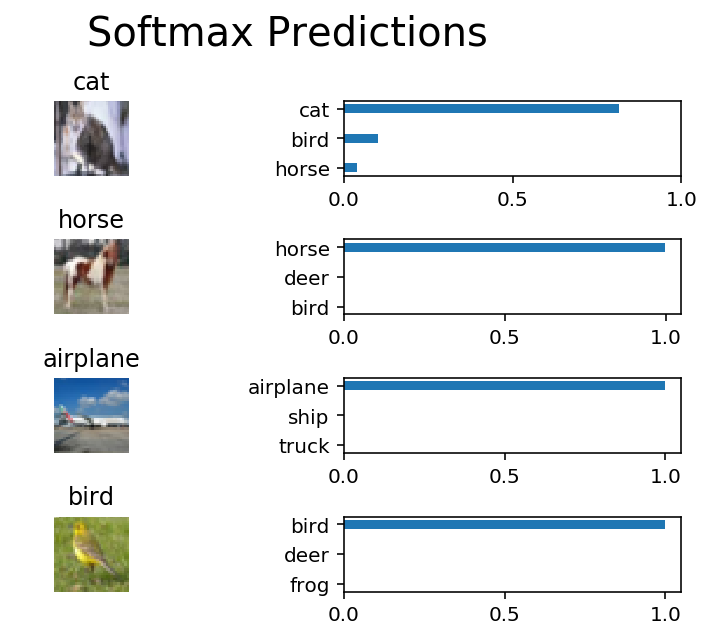

In [87]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.